In [1]:
import glob
import os 

# from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import files
import occupancy
import wait_times

# General Utils

In [5]:
SCENARIOS_PATH = r"E:/Files/CodeProjects/MATSim/Scenarios/"
RUN_DIR = "runner-tests/9"


def fmt_timedelta(x):
    ts = x.total_seconds()
    hours, remainder = divmod(ts, 3600)
    minutes, _ = divmod(remainder, 60)
    return ('{:02d}:{:02d}').format(int(hours), int(minutes)) 


# Ocuupancy utils

In [6]:
df = files.iterate_algorithms(PATH, occupancy.get_ocucpancy_aggregation)
pd.DataFrame(df).stack().unstack(level=-2).fillna(0)

output for RUN_ID: 9, from func: get_ocucpancy_aggregation


0 pax     1 pax     2 pax     3 pax  \
evening DRT                         0.040024  0.171530  0.113053  0.033034   
        DynamicRideSharingStrategy  0.072202  0.362090  0.023202  0.000000   
        ExtDemandSupplyBeamSharing  0.070409  0.380198  0.009944  0.000000   
        HighCapacityDispatcher      0.088437  0.375364  0.016640  0.000000   
        TShareDispatcher            0.072115  0.394577  0.000000  0.000000   
morning DRT                         0.093424  0.186578  0.158725  0.047869   
        DynamicRideSharingStrategy  0.121647  0.472398  0.038425  0.001087   
        ExtDemandSupplyBeamSharing  0.124439  0.497202  0.018259  0.000740   
        HighCapacityDispatcher      0.142287  0.482296  0.036800  0.000734   
        TShareDispatcher            0.122173  0.536164  0.000000  0.000000   

                                       4 pax  off-service  rebalance      stay  
evening DRT                         0.003356          0.0   0.000000  0.639003  
        DynamicRideSharingStrategy  0.000000          0.0   0.132805  0.409702  
        ExtDemandSupplyBeamSharing  0.000000          0.0   0.000000  0.539448  
        HighCapacityDispatcher      0.000000          0.0   0.020288  0.499272  
        TShareDispatcher            0.000000          0.0   0.000000  0.533308  
morning DRT                         0.005995          0.0   0.000000  0.507408  
        DynamicRideSharingStrategy  0.000000          0.0   0.115512  0.250931  
        ExtDemandSupplyBeamSharing  0.000000          0.0   0.000000  0.359361  
        HighCapacityDispatcher      0.000000          0.0   0.051012  0.286870  
        TShareDispatcher            0.000000          0.0   0.000000  0.341663

output for RUN_ID: 12, from func: get_occupancy_graphs


<Figure size 432x288 with 0 Axes>

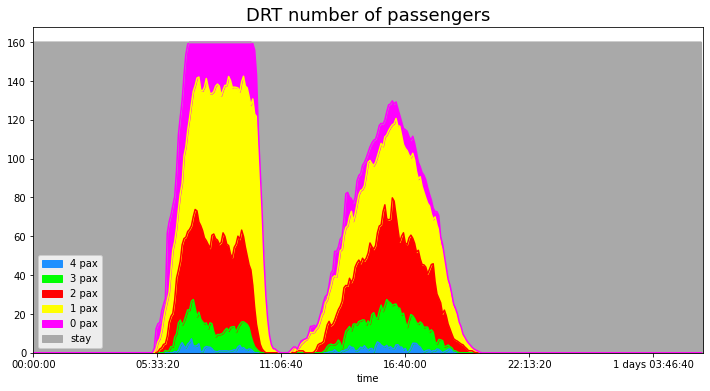

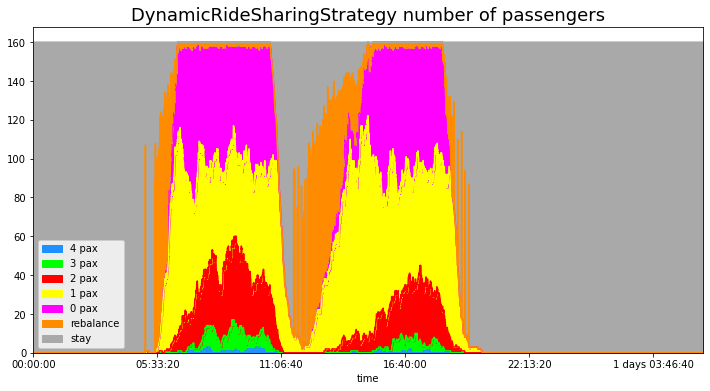

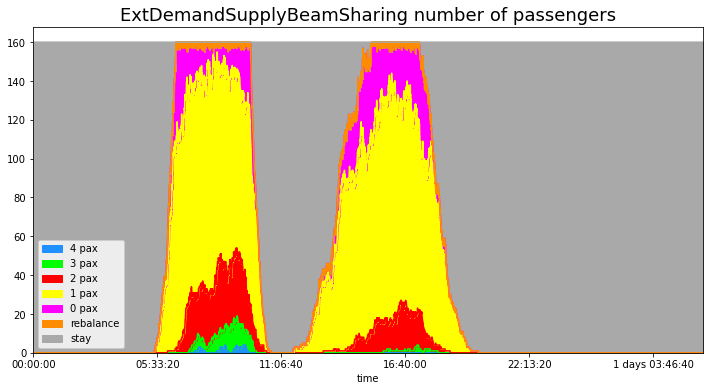

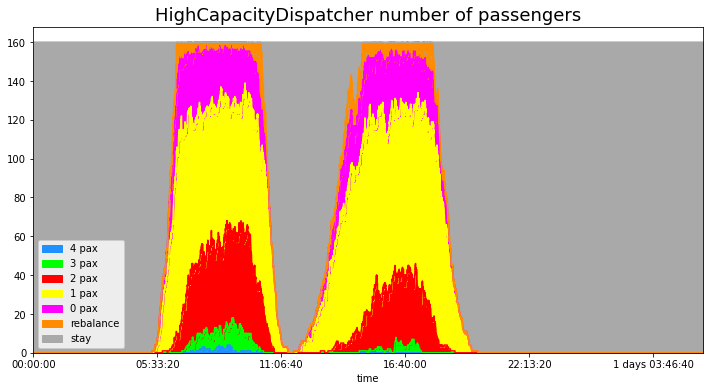

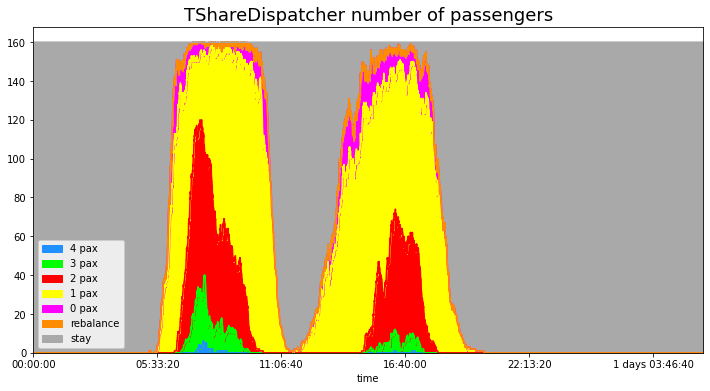

<Figure size 432x288 with 0 Axes>

In [7]:
axes = files.iterate_algorithms(PATH, occupancy.get_occupancy_graphs)
fig = plt.figure()
map(fig.add_axes, axes)
fig

# Wait time utils

In [8]:
r = files.iterate_algorithms(PATH + "9", wait_times.get_wait_stats)
pd.DataFrame(r).stack().unstack(level=-2)

output for RUN_ID: 9, from func: get_wait_stats


mean wait  95p wait
DRT                         597.540000   1279.90
DynamicRideSharingStrategy  315.806875    591.05
ExtDemandSupplyBeamSharing  287.869375    604.20
HighCapacityDispatcher      490.124375   1294.40
TShareDispatcher            275.153750    590.05

# Population Utils

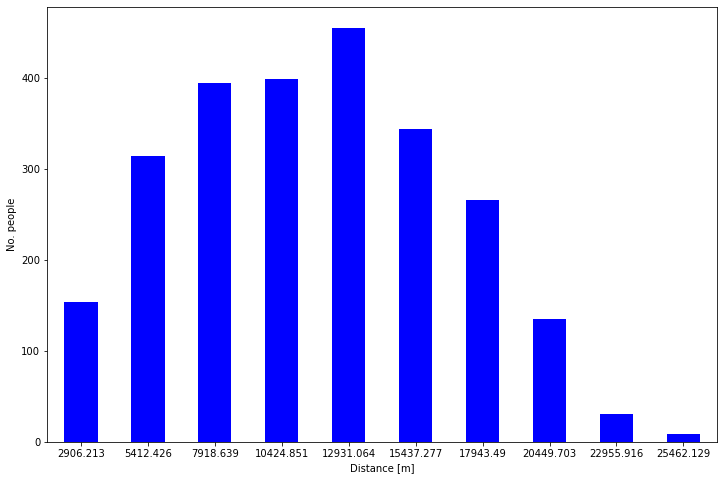

In [19]:
def get_origin_destination_data(alg_path):
    pop_filename = "Population*.xml.DistanceInfo.csv"
    path = glob.glob(os.path.join(alg_path, pop_filename))[0]
    df = pd.read_csv(path, names=["person", "distance"], skiprows=1)
    return pd.cut(df["distance"], include_lowest=True, bins=10)


out = get_origin_destination_data(r"E:\Files\CodeProjects\MATSim\Scenarios\runner-tests\9\DRT")
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(12,8))
ax.set_xticklabels([c.right for c in out.cat.categories])
ax.set_xlabel("Distance [m]")
ax.set_ylabel("No. people")
plt.show()